In [1]:
import requests
import json
import lxml.html as lh
import pandas as pd

from bs4 import BeautifulSoup as bs

from investool.ticker import isin2ft

In [2]:
ft_url = 'http://markets.ft.com'

In [3]:
# Get Fund historical prices from markets.ft.com

def get_historical_prices( isin_ticker, fromDate='2018/01/01', toDate='2018/11/27' ):   
    
    q_params = {'startDate': fromDate,
                'endDate': toDate,
                'symbol': isin2ft(isin_ticker)}

    # Download the result from website
    r = requests.get( ft_url + '/data/equities/ajax/get-historical-prices', params = q_params)
    #print(r.url)

    # Check if it is ok
    if r.status_code == requests.codes.ok:

        # Prepare table and headers
        headers = ["Date", "Open", "High", "Low", "Close", "Volume"]
        col = []
        for h in headers:
            col.append((h,[]))

        #Store the contents of the website under doc
        doc = lh.fromstring(r.json()['html'])
    
        #Parse data that are stored between <tr>..</tr> of HTML
        tr_elements = doc.xpath('//tr')
    
        #Since out first row is the header, data is stored on the second row onwards
        for e in tr_elements:
            #If row is not of size 6, the //tr data is not from our table 
            if len(e)!=6:
                break
    
            #i is the index of our column
            i=0
    
            #Iterate through each element of the row
            for t in e.iterchildren():
         
                if i==0:
                    data=t[1].text_content()
                else:
                    data=t.text_content() 
                
                #Append the data to the empty list of the i'th column
                col[i][1].append(data)
        
                #Increment i for the next column
                i+=1

        return {title:column for (title,column) in col}   


In [12]:
df = pd.DataFrame(get_historical_prices('LU0270844359',fromDate='2015/01/01',toDate='2018/12/31'))

df['Date'] = pd.to_datetime(df['Date'])
df['Open'] = pd.to_numeric(df['Open'].replace({',':''},regex=True))
df['High'] = pd.to_numeric(df['High'].replace({',':''},regex=True))
df['Low'] = pd.to_numeric(df['Low'].replace({',':''},regex=True))
df['Close'] = pd.to_numeric(df['Close'].replace({',':''},regex=True))


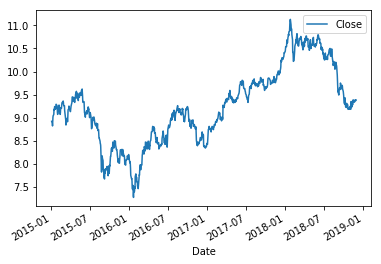

In [13]:
df.plot(x='Date',y='Close')

In [14]:
df

,Date,Open,High,Low,Close,Volume
0,2018-11-30,9.38,9.38,9.38,9.38,----
1,2018-11-29,9.37,9.37,9.37,9.37,----
2,2018-11-28,9.38,9.38,9.38,9.38,----
3,2018-11-27,9.38,9.38,9.38,9.38,----
4,2018-11-26,9.38,9.38,9.38,9.38,----
5,2018-11-23,9.34,9.34,9.34,9.34,----
6,2018-11-22,9.37,9.37,9.37,9.37,----
7,2018-11-21,9.37,9.37,9.37,9.37,----
8,2018-11-20,9.34,9.34,9.34,9.34,----
9,2018-11-19,9.38,9.38,9.38,9.38,----
